[View in Colaboratory](https://colab.research.google.com/github/venabled/machine-learning-tutorial/blob/master/Two_Layer_Dense_Network.ipynb)

In [0]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau
import keras.utils

  Running setup.py bdist_wheel for simplekml ... - \ done
  Stored in directory: /content/.cache/pip/wheels/12/12/8f/9e22dd924dc3cedb41f9888379000713e980478437af610d0e
Successfully built simplekml


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train -= 128.0
x_test -= 128.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

170500096/170498071 [==============================] - 41s 0us/step


In [54]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(100, kernel_regularizer=l2(0.002)))
model.add(Activation('elu'))
# model.add(Dense(64, kernel_regularizer=l2(0.001)))
# model.add(Activation('sigmoid'))
model.add(BatchNormalization())
model.add(Dense(10, kernel_regularizer=l2(0.001)))
model.add(Activation('softmax'))

model.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               307300    
_________________________________________________________________
activation_16 (Activation)   (None, 100)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 100)               400       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
_________________________________________________________________
activation_17 (Activation)   (None, 10)                0         
Total params: 308,710
Trainable params: 308,510
Non-trainable params: 200
_________________________________________________________________


In [17]:
import keras.backend as K
K.get_value(model.optimizer.lr)

0.00020000001

In [55]:
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=1, 
                    callbacks=[ReduceLROnPlateau(patience=5)])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 184us/step - loss: 1.8736 - acc: 0.4055 - val_loss: 1.7864 - val_acc: 0.4134
Epoch 2/100
50000/50000 [==============================] - 8s 166us/step - loss: 1.7348 - acc: 0.4435 - val_loss: 1.7759 - val_acc: 0.4192
Epoch 3/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.7182 - acc: 0.4493 - val_loss: 1.7264 - val_acc: 0.4483
Epoch 4/100
50000/50000 [==============================] - 8s 162us/step - loss: 1.7071 - acc: 0.4529 - val_loss: 1.7237 - val_acc: 0.4479
Epoch 5/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.6973 - acc: 0.4532 - val_loss: 1.7234 - val_acc: 0.4441
Epoch 6/100
50000/50000 [==============================] - 8s 165us/step - loss: 1.6932 - acc: 0.4557 - val_loss: 1.6948 - val_acc: 0.4462
Epoch 7/100
50000/50000 [==============================] - 8s 166us/step - loss: 1.6826 - acc: 0.4574 - val_loss: 1.

In [26]:
# lr = K.get_value(model.optimizer.lr)
# K.set_value(model.optimizer.lr, lr*0.60)
# print((lr, K.get_value(model.optimizer.lr)))

(2.0000001e-19, 1.2000001e-19)


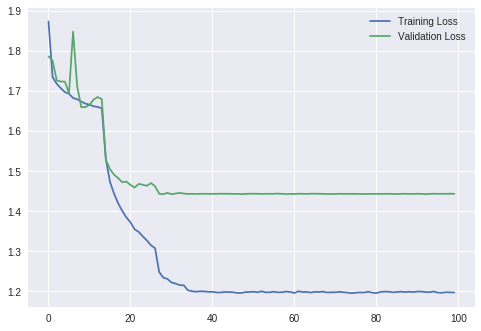

In [67]:
plt.plot(history.epoch, history.history['loss'], history.epoch, history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])